<a href="https://colab.research.google.com/github/DavidB363/file-store/blob/master/Lab%202/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data_size = data.size
# type(data)

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):

	sample = np.ndarray(shape=(n_iterations,sample_size))

	for i in range(n_iterations):
		sample[i]=np.random.choice(data, sample_size)
		
	mean_array = np.ndarray(shape=n_iterations)

	for j in range(n_iterations):
		mean_array[j]=sample[j].mean()

	data_mean = mean_array.mean()

	mean_array_sorted = np.sort(mean_array)

	lower = np.percentile(mean_array_sorted, 2.5)

	upper = np.percentile(mean_array_sorted, 97.5)



	# <---INSERT YOUR CODE HERE--->
	return data_mean, lower, upper



In [316]:
  boot = boostrap_mean(data, data.shape[0], 6)
  print('data_mean =', boot[0])
  print('lower =', boot[1])
  print('upper =', boot[2])

data_mean = 9.488095238095239
lower = 8.035714285714286
upper = 10.714285714285714


In [0]:
#data_mean = data.mean()
#data_mean

In [0]:
#sample_size = 6
#n_iterations = 30

#samples_matrix = np.ndarray(shape=(n_iterations,sample_size))

#data

In [0]:
#for i in range(n_iterations):
#  for j in range(sample_size):
#    rand_num = np.random.randint(data_size, size=1)
#    samples_matrix[i][j]=data[rand_num]
    
#samples_matrix

In [0]:
#for i in range(n_iterations):
#  samples_matrix[i]=np.random.choice(data, sample_size)
    
#samples_matrix

In [0]:
 #mean_array = np.ndarray(shape=n_iterations)
 #mean_array

In [0]:
#for i in range(n_iterations):
#  mean_array[i]=samples_matrix[i].mean()
    
#mean_array


In [0]:
#mean_array_sorted = np.sort(mean_array)
#mean_array_sorted 

In [0]:
#percentile_lower = np.percentile(mean_array_sorted, 2.5)
#percentile_lower

In [0]:
#percentile_upper = np.percentile(mean_array_sorted, 97.5)
#percentile_upper

In [0]:
# Call your bootstrap function and plot the results

#boots = []
#for i in range(100, 100000, 1000):
#    boot = boostrap_mean(data, data.shape[0], i)
#    boots.append([i, boot[0], "mean"])
#    boots.append([i, boot[1], "lower"])
#    boots.append([i, boot[2], "upper"])

#df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
#sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

#sns_plot.axes[0, 0].set_ylim(0,)
#sns_plot.axes[0, 0].set_xlim(0, 100000)

###sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
###sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	sample = np.ndarray(shape=(n_iterations,sample_size))

	for i in range(n_iterations):
		sample[i]=np.random.choice(data, sample_size)
		
	mean_array = np.ndarray(shape=n_iterations)

	for j in range(n_iterations):
		mean_array[j]=sample[j].mean()

	data_mean = mean_array.mean()

	mean_array_sorted = np.sort(mean_array)

	a=(100-ci)/2.0
	lower = np.percentile(mean_array_sorted, a)
	b = 100-a
	upper = np.percentile(mean_array_sorted, b)
	return data_mean, lower, upper

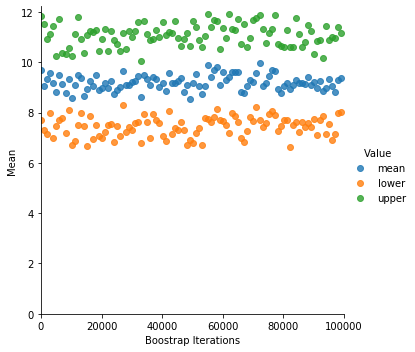

In [326]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


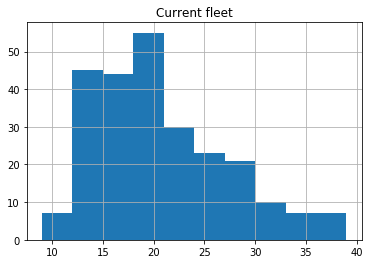

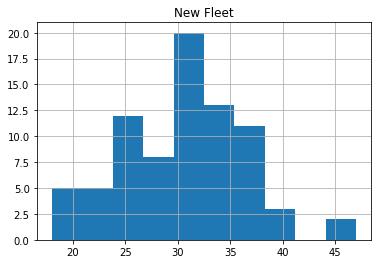

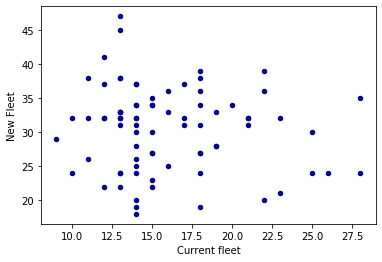

In [329]:
# Load and visualise the vehicles dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df.values.T[1]
data_size = data.size
data_size


# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df.hist(column='Current fleet')
df.hist(column='New Fleet')
ax1 = df.plot.scatter(x='Current fleet',
                      y='New Fleet',
                      c='DarkBlue')

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

